This notebook comes mostly from following a tutorial from https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

In [2]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))
import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np 
print("NumPy version: {}". format(np.__version__))
import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 
import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]


C:\Users\beama\AppData\Local\Temp\ipykernel_26284\1584600338.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


pandas version: 2.2.0
matplotlib version: 3.8.2
NumPy version: 1.26.3
SciPy version: 1.12.0
IPython version: 8.20.0
scikit-learn version: 1.4.0
-------------------------


In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
# import data

data_raw = pd.read_csv('titanictrain.csv')
data_val = pd.read_csv('titanictest.csv')

# make a copy of the data

data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val] # to clean both datasets at once

data_raw.info()
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


In [5]:
# check missing values

print('NAs in train:\n', data1.isnull().sum())
print('NAs in test:\n', data_val.isnull().sum())

data_raw.describe(include = 'all')


NAs in train:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
NAs in test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Data Cleaning

In [6]:
data1['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [7]:
# dealing with NAs

for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

# drop columns
to_drop = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(to_drop, axis = 1, inplace = True)

# check NAs

print('NAs in train:\n', data1.isnull().sum())
print('NAs in test:\n', data_val.isnull().sum())

NAs in train:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
NAs in test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [8]:
# create new features based on existing ones

for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 # family size based on the number of siblings, spouses, parents and children
    dataset['IsAlone'] = 1 # initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # update to no/0 if family size is greater than 1
    dataset['Title'] = dataset['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0] # keep only the title from the name
    
    # bin the continuous variables (easier interpretation, good for outliers, enhanced generalization...)
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    # cut vs qcut: cut gives equal sized bins, qcut gives equal number of data points in each bin

# clean up rare titles

# create a true or false series based on the counts
titles = (data1['Title'].value_counts() < 10) # 10 is the common threshold

# apply the mask to the titles
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if titles.loc[x] == True else x) # places Misc if title is rare
print(data1['Title'].value_counts())

# preview data

data1.info()
data_val.info()
data1.sample(10)



Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
110,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,52.0000,S,1,1,Mr,"(31.0, 512.329]","(32.0, 48.0]"
629,0,3,"O'Connell, Mr. Patrick D",male,28.0,0,0,7.7333,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
855,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,9.3500,S,2,0,Mrs,"(7.91, 14.454]","(16.0, 32.0]"
714,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(48.0, 64.0]"
568,0,3,"Doharr, Mr. Tannous",male,28.0,0,0,7.2292,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,16.0000,S,1,1,Mrs,"(14.454, 31.0]","(48.0, 64.0]"
223,0,3,"Nenkoff, Mr. Christo",male,28.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
564,0,3,"Meanwell, Miss. (Marion Ogden)",female,28.0,0,0,8.0500,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
272,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,19.5000,S,2,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"


In [9]:
# encode variables

label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

# define the target variable (y)
y = ['Survived']

# define the x variables

data1_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] # original features
data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare'] # coded for calculation

data1_xy = y + data1_x
print('Original X Y: ', data1_xy, '\n')

# define x variables with bin features

data1_x_bin = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] # continuous are binned
data1_xy_bin = y + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

# define x and y variables for dummy features original

data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = y + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

# double check all of the dummy variables are there

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,False,True,False,False,True,False,False,False,True,False
1,1,1,0,38.0,71.2833,2,0,True,False,True,False,False,False,False,False,False,True
2,3,0,0,26.0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False
3,1,1,0,35.0,53.1000,2,0,True,False,False,False,True,False,False,False,False,True
4,3,0,0,35.0,8.0500,1,1,False,True,False,False,True,False,False,False,True,False


In [10]:
# double check cleaned data

print('NAs in train: \n', data1.isnull().sum())
print(data1.info())
print('-'*10)

print('NAs in test: \n', data_val.isnull().sum())
print(data_val.info())
print('-'*10)


NAs in train: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   Famil

In [11]:
# split all datasets: the one for model calculation, the one with bins and the one with dummy variables

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[y], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[y] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[y], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


### EDA

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

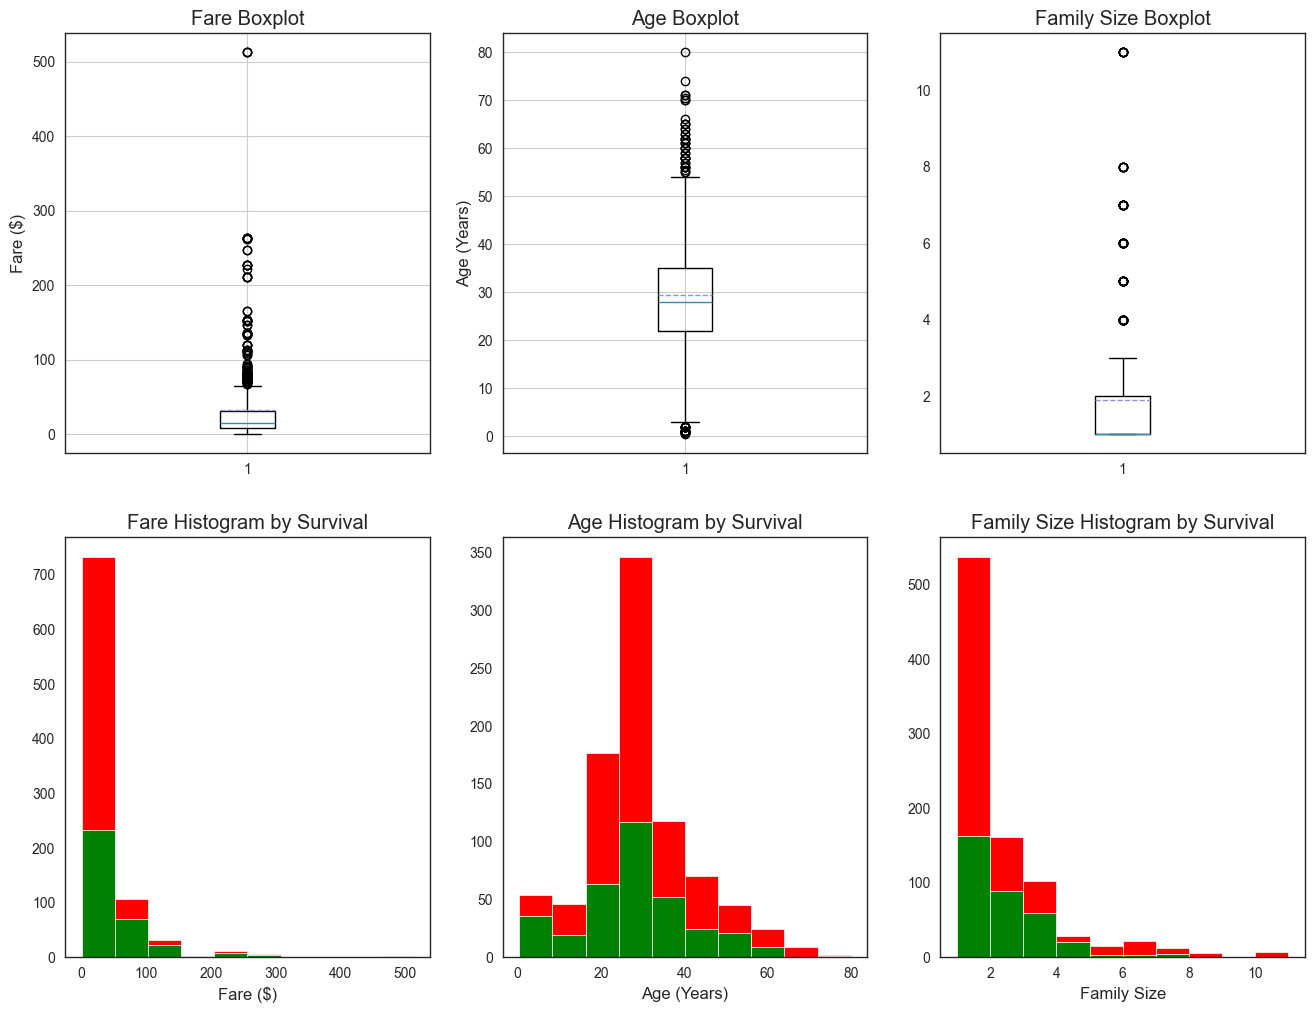

In [12]:
# correlation of !discrete! variables with the survival

# using group by (pivot table)
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, y[0]]].groupby(x, as_index = False).mean())
        print('-'*10, '\n')

# using crosstabs

print(pd.crosstab(data1['Title'], data1[y[0]]))

# plots

plt.figure(figsize = [16,12])

plt.subplot(231)
plt.boxplot(x = data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')
plt.grid(True)

plt.subplot(232)
plt.boxplot(x = data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.grid(True)

plt.subplot(233)
plt.boxplot(x = data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived'] == 1]['Fare'], data1[data1['Survived'] == 0]['Fare']], stacked = True, color = ['g', 'r'], label = ['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')

plt.subplot(235)
plt.hist(x = [data1[data1['Survived'] == 1]['Age'], data1[data1['Survived'] == 0]['Age']], stacked = True, color = ['g', 'r'], label = ['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')

plt.subplot(236)
plt.hist(x = [data1[data1['Survived'] == 1]['FamilySize'], data1[data1['Survived'] == 0]['FamilySize']], stacked = True, color = ['g', 'r'], label = ['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size')

plt.show()


<Axes: xlabel='FamilySize', ylabel='Survived'>

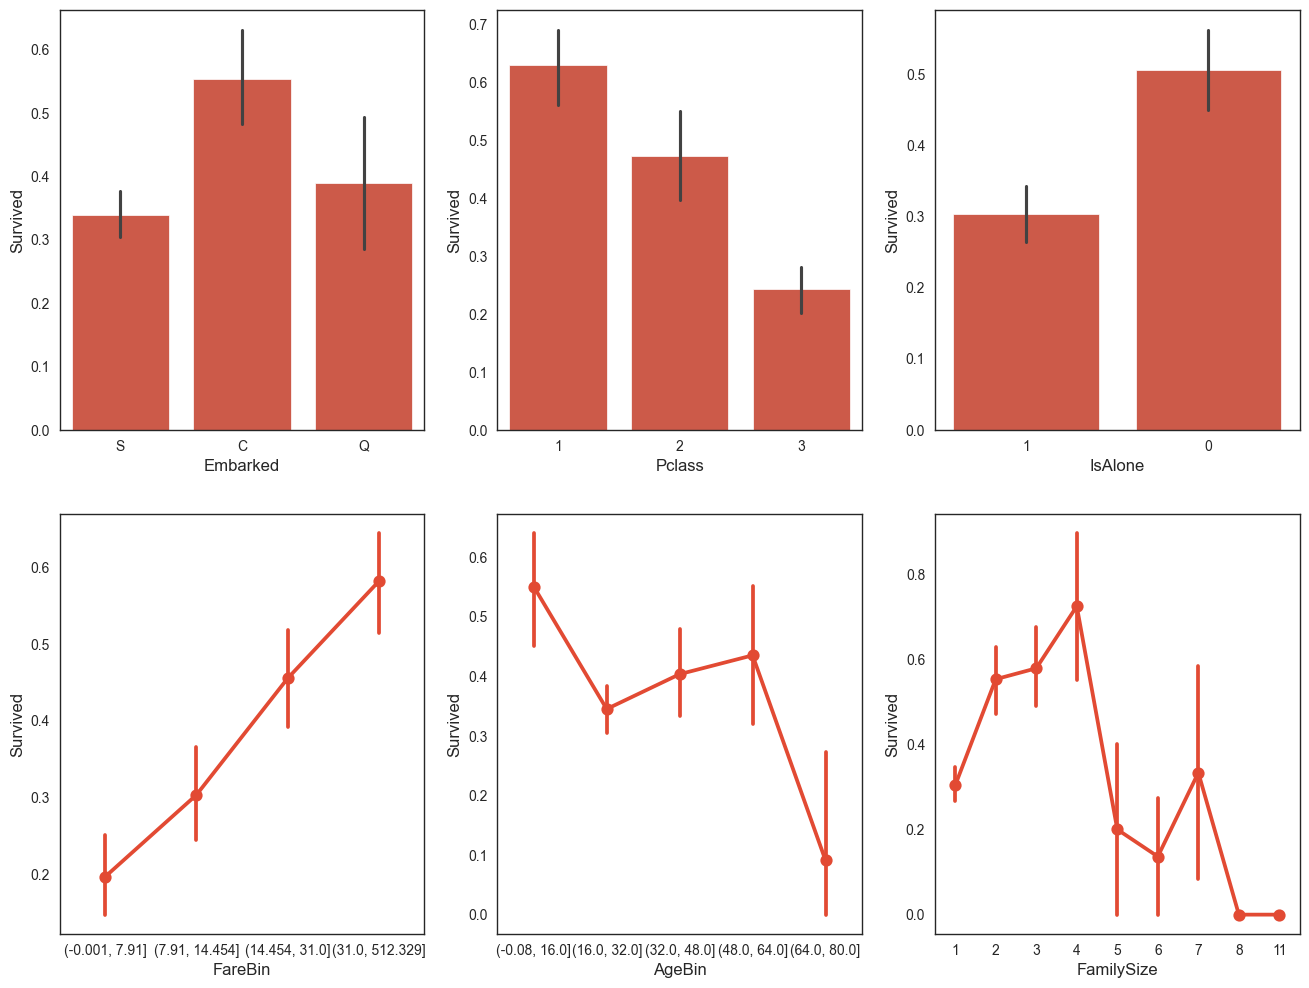

In [13]:
# correlation using seaborn

fig, saxis = plt.subplots(2, 3, figsize = (16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data = data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order = [1,2,3], data = data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order = [1,0], data = data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived', data = data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived', data = data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data = data1, ax = saxis[1,2])


Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

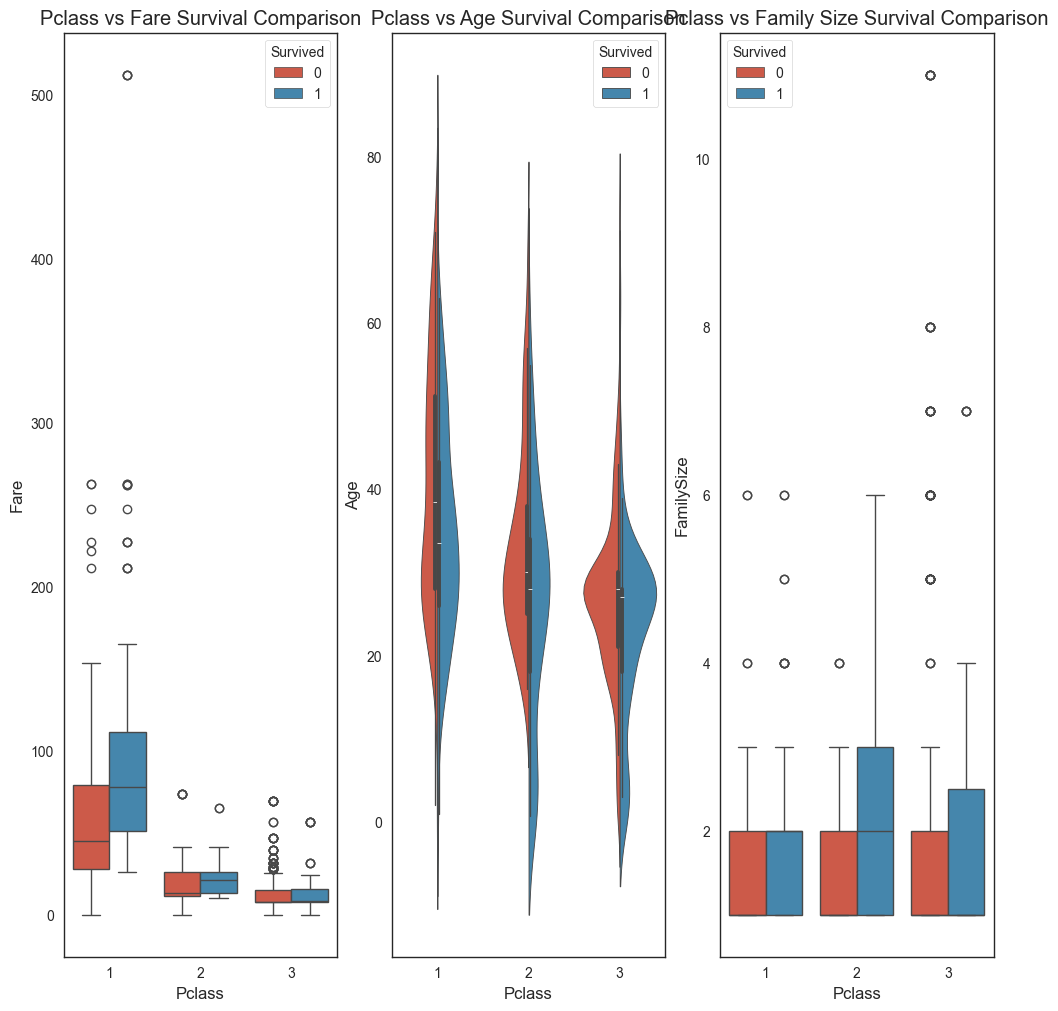

In [14]:
# class mattered in survival, lets compare it with other feature

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (12,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y = 'FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')



more examples of graphs in the tutorial

### Modelling

In [15]:
MLAs = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [17]:
# cv split

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0) # run model 10x with 60/30 split intentionally leaving out 10%

# create table to compare MLA metrics
MLAs_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLAs_compare = pd.DataFrame(columns = MLAs_columns)

# create table to compare MLA predictions
MLA_predict = data1[y]

# index through MLAs and save performance to table
row_index = 0
for alg in MLAs:

    # name and parameters
    MLA_name = alg.__class__.__name__
    MLAs_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLAs_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    # score with cv

    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[y], cv = cv_split, return_train_score = True)
    MLAs_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLAs_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLAs_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLAs_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3 # statistically captures 99.7% of the subsets (the worst case scenario)
    # "The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations of the mean."

    # save preds

    alg.fit(data1[data1_x_bin], data1[y])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])

    row_index += 1

# print and sort table
    
MLAs_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True) # show highest accuracy first
MLAs_compare




,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.040916,0.048726
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890824,0.826866,0.054656,0.145341
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.045663,0.093667
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.823881,0.057472,0.159754
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.823507,0.060084,0.30564
1,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.891199,0.823134,0.084246,0.030261
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822761,0.049873,0.135199
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.821642,0.050261,0.004344
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'estimator': None, 'l...",0.820412,0.81194,0.049861,0.158623
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.871723,0.810448,0.049254,0.252172


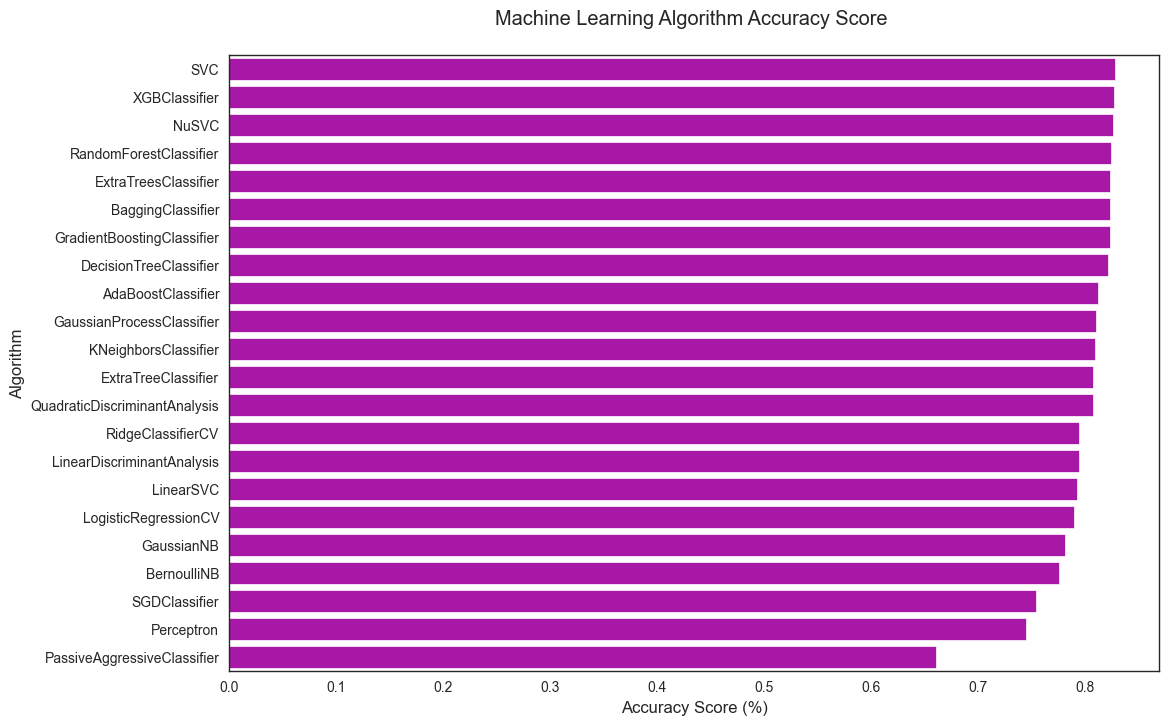

In [18]:
# barplot with seaborn

sns.barplot(x = 'MLA Test Accuracy Mean', y = 'MLA Name', data = MLAs_compare, color = 'm')

# prettify using pyplot

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()


In [22]:
# get test pred from SVC

svc = svm.SVC(probability = True)
svc.fit(data1[data1_x_bin], data1[y])
preds = svc.predict(data_val[data1_x_bin]) # got 0.76794 on kaggle

# create submission file

submission = pd.DataFrame({'PassengerId': data_val['PassengerId'], 'Survived': preds})
submission.to_csv('submission.csv', index = False)
print(submission.sample(10)) #


     PassengerId  Survived
104          996         1
197         1089         1
330         1222         1
136         1028         0
90           982         1
1            893         1
107          999         0
163         1055         0
407         1299         0
310         1202         0


### Hyperparameter tuning

In [24]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[y], cv = cv_split, return_train_score = True)
dtree.fit(data1[data1_x_bin], data1[y])

print('BEFORE DT Parameters: ', dtree.get_params())
print('BEFORE DT Training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT Test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*3))
print('-'*10)

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,None], 'random_state': [0]}

# tune using gridsearch
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid = param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
tune_model.fit(data1[data1_x_bin], data1[y])

print('AFTER DT Parameters: ', tune_model.best_params_)
print('AFTER DT Training w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score 3*std: +/- {:.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 0.06
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00
----------


In [25]:
# predict test on the tuned model

predstuned = tune_model.predict(data_val[data1_x_bin]) # got 0.77511 on kaggle
submission2 = pd.DataFrame({'PassengerId': data_val['PassengerId'], 'Survived': predstuned})
submission2.to_csv('submission2.csv', index = False)
print(submission2.sample(10)) 


     PassengerId  Survived
173         1065         0
273         1165         1
185         1077         0
38           930         0
266         1158         0
57           949         0
382         1274         0
260         1152         0
204         1096         0
350         1242         1


### Tuned + Feature Selection

Using Recursive Feature Elimination (RFE) for feature selection

In [30]:
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape)
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print('BEFORE DT RFE Training with bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT RFE Test with bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100)
)
print('BEFORE DT RFE Test with bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*3))
print('-'*10)

# feature selection

dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
#Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of 
#recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 
#First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through 
#any specific attribute or callable. Then, the least important features are pruned from current set of features. That 
#procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached

# the number of features selected is set to the number of features that maximize the cross-validation score !

dtree_rfe.fit(data1[data1_x_bin], data1[y])

X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()] # Get a mask, or integer index, of the features selected.
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[y], cv = cv_split, return_train_score = True) # grab only the selected features

print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape)
print('AFTER DT RFE Training Columns New: ', X_rfe)

print('AFTER DT RFE Training with bin score mean: {:.2f}'.format(rfe_results['train_score'].mean()*100))
print('AFTER DT RFE Test with bin score mean: {:.2f}'.format(rfe_results['test_score'].mean()*100))
print('AFTER DT RFE Test with bin score 3*std: +/- {:.2f}'.format(rfe_results['test_score'].std()*3))

# tune rfe model

rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid = param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
rfe_tune_model.fit(data1[X_rfe], data1[y])

print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print('AFTER DT RFE Tuned Training w/bin score mean: {:.2f}'.format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_]*100))
print('AFTER DT RFE Tuned Test w/bin score mean: {:.2f}'.format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print('AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}'.format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100*3))



BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training with bin score mean: 89.51
BEFORE DT RFE Test with bin score mean: 82.09
BEFORE DT RFE Test with bin score 3*std: +/- 0.06
----------
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training with bin score mean: 88.16
AFTER DT RFE Test with bin score mean: 83.06
AFTER DT RFE Test with bin score 3*std: +/- 0.06
AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21


In [31]:
# get pred from tuned rfe

predsrfe = rfe_tune_model.predict(data_val[X_rfe]) 
submission3 = pd.DataFrame({'PassengerId': data_val['PassengerId'], 'Survived': predsrfe})
submission3.to_csv('submission3.csv', index = False)

Feature Selection deleted one feature: Embarked_Code

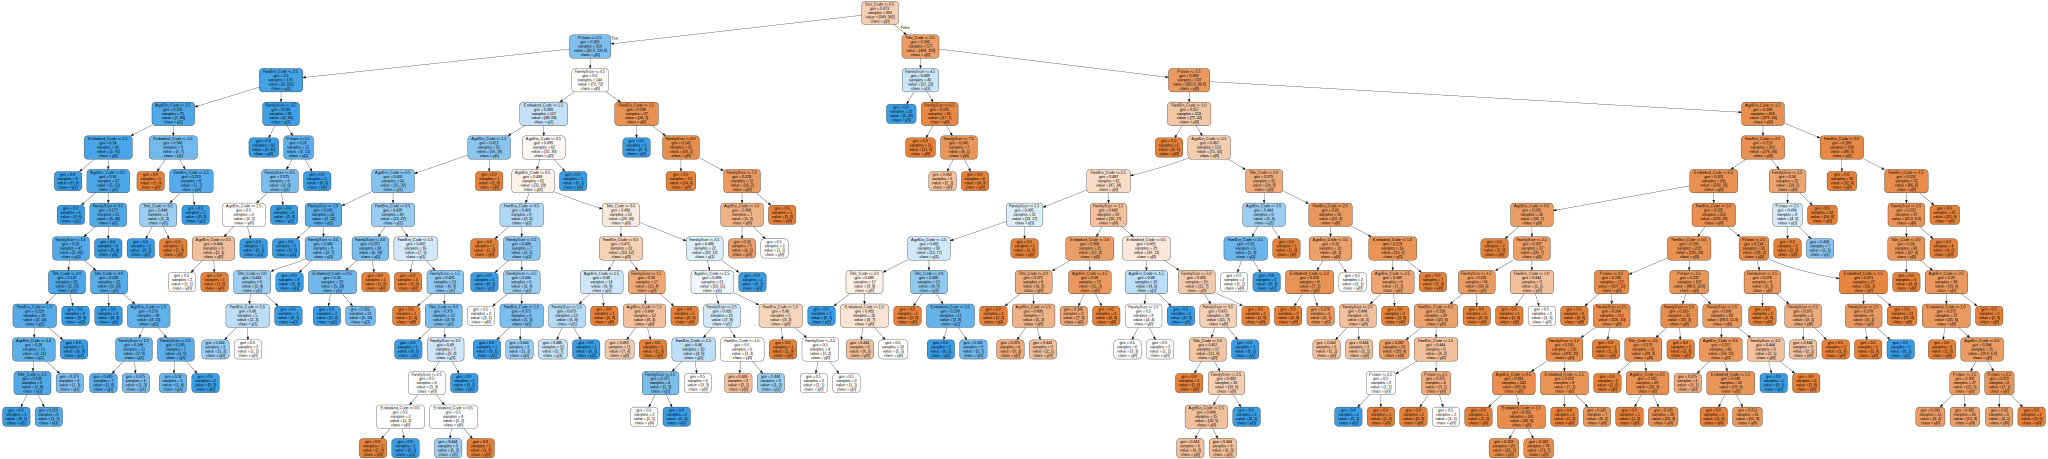

In [41]:
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

### Validate and Implement

In [43]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

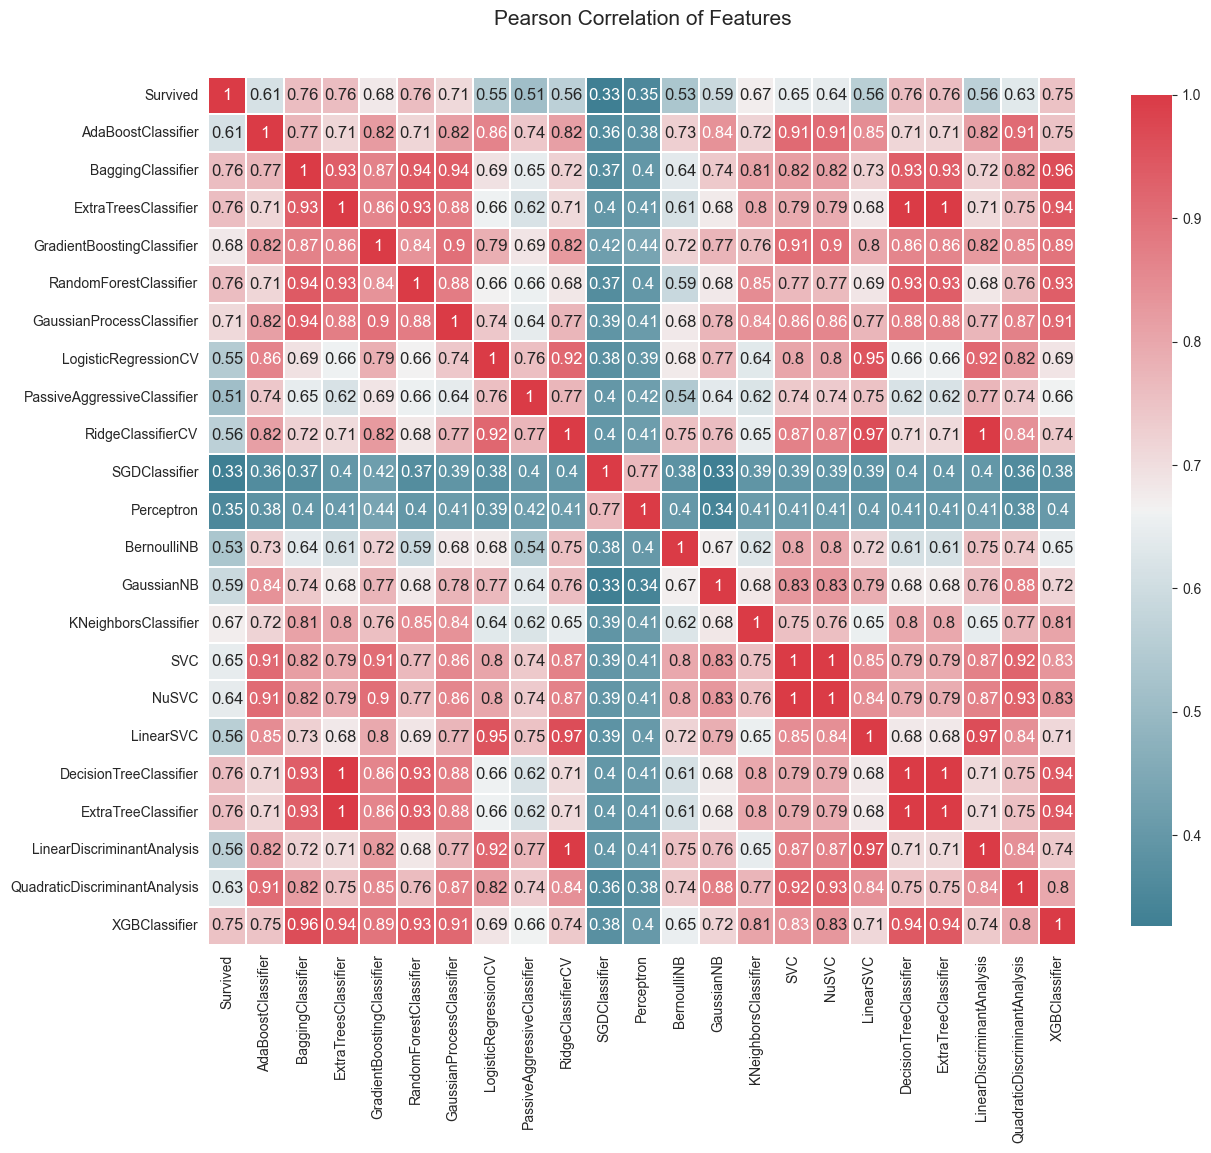

In [44]:
# preds correlation heat map

correlation_heatmap(MLA_predict)

To get a better pred we can ensemble models whose predictions are not highly correlated (1.0)

Ensembling with default parameters

In [48]:
vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    ('gpc', gaussian_process.GaussianProcessClassifier()),

    ('lr', linear_model.LogisticRegressionCV()),
    
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    ('knn', neighbors.KNeighborsClassifier()),
    
    ('svc', svm.SVC(probability=True)),
    
   ('xgb', XGBClassifier())

]

# create a voting classifier

vote_hard = ensemble.VotingClassifier(estimators = vote_est, voting = 'hard') # If ‘hard’, uses predicted class labels for majority rule voting. 
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[y], cv = cv_split, return_train_score = True)
vote_hard.fit(data1[data1_x_bin], data1[y])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100))
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*3))
print('-'*10)

# soft voting

vote_soft = ensemble.VotingClassifier(estimators = vote_est, voting = 'soft') #  if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities,
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[y], cv = cv_split, return_train_score = True)
vote_soft.fit(data1[data1_x_bin], data1[y])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100))
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*3))

Hard Voting Training w/bin score mean: 87.25
Hard Voting Test w/bin score mean: 82.01
Hard Voting Test w/bin score 3*std: +/- 0.04
----------
Soft Voting Training w/bin score mean: 87.75
Soft Voting Test w/bin score mean: 82.24
Soft Voting Test w/bin score 3*std: +/- 0.04


In [49]:
# get pred from soft voting

predssoft = vote_soft.predict(data_val[data1_x_bin])
submission4 = pd.DataFrame({'PassengerId': data_val['PassengerId'], 'Survived': predssoft})
submission4.to_csv('submission4.csv', index = False)
print(submission4.sample(10))

     PassengerId  Survived
346         1238         0
137         1029         0
328         1220         0
177         1069         1
128         1020         0
212         1104         0
255         1147         0
153         1045         0
293         1185         0
188         1080         0


Ensemble with Hyperparameter tuning

In [51]:
# grids

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param = [
            [{
            #AdaBoostClassifier 
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV 
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB 
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier 
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC 
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() 
for clf, param in zip (vote_est, grid_param):

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[y])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))


The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 99.59 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 63.50 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 79.87 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 91.30 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 118.61 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 9.19 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_sta

In [52]:
# hard vote w tuned

grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[y], cv  = cv_split, return_train_score = True)
grid_hard.fit(data1[data1_x_bin], data1[y])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*3))
print('-'*10)

# soft vote w tuned

grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[y], cv  = cv_split, return_train_score = True)
grid_soft.fit(data1[data1_x_bin], data1[y])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*3))
print('-'*10)



Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.34
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.35
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 0.05
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.83
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.28
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 0.06
----------


In [54]:
print(data_val.info())
print('-'*10)

# hard voting tuned pred

grid_hard_pred = grid_hard.predict(data_val[data1_x_bin]) # got 0.77511 on kaggle
submission5 = pd.DataFrame({'PassengerId': data_val['PassengerId'], 'Survived': grid_hard_pred})
submission5.to_csv('submission5.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Name           418 non-null    object  
 3   Sex            418 non-null    object  
 4   Age            418 non-null    float64 
 5   SibSp          418 non-null    int64   
 6   Parch          418 non-null    int64   
 7   Ticket         418 non-null    object  
 8   Fare           418 non-null    float64 
 9   Cabin          91 non-null     object  
 10  Embarked       418 non-null    object  
 11  FamilySize     418 non-null    int64   
 12  IsAlone        418 non-null    int64   
 13  Title          418 non-null    object  
 14  FareBin        418 non-null    category
 15  AgeBin         418 non-null    category
 16  Sex_Code       418 non-null    int32   
 17  Embarked_Code  418 non-null    int3

The train dataset has a different distribution than the test/validation dataset and population. This created wide margins between the cross validation (CV) accuracy score and Kaggle submission accuracy score.